# Large asymmetry test

We generate **N** galaxies with a varying size, magnitude, Sersic index, intrinsic asymmetry, sky magnitude, etc, and look at the behaviour of CAS and squared asymmetry metrics for these objects.

We draw each value of the following parameters from a uniform distribution with a min and a max value:

| Parameter | Min. | Max. |
| --- | --- | --- |
| Mag. | 10 | 16 |
| Sky RMS [mag/arcsec$^2$] | 20 | 26 |
| # clumps | 5 | 30 |
| PSF FWHM [arcsec] | 0 | 2 |
| Sersic n | 1 | 3 |

The radius of the generated galaxy is calculated as $-1.9 \textrm{mag} + 35$ arcsec, with a Gaussian scatter with $\sigma = 1.5$.

#### Imports

In [163]:
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
plt.style.use('/home/jovyan/work/liza/matplotlibrc')
plt.rcParams['font.size'] = 10

Read in all the pickle files with outputs for each generated galaxy:

In [178]:
# files = []
# folders = ['trial1', 'trial2', 'trial3', 'trial4', 'trial5']

# for folder in folders:
#     filenames = ! ls tests/{folder}
#     for fn in filenames:    
#         with open(f'tests/{folder}/{fn}', 'rb') as f:
#             files.append(pickle.load(f))
            
# rows = []
# for f in files:
#     row = f['input']
#     row_out = f['a']
#     row.update(row_out)
#     rows.append(row)
# data = pd.DataFrame(rows)

# data['da_cas'] = data.a_cas - data.a_cas_real
# data['da_sq'] = data.a_sq - data.a_sq_real
# data['da_sq_nocorr'] = data.a_sq_nocorr - data.a_sq_real

Instead, just read in the CSV with the data:

In [179]:
data.to_csv('tests/data.csv', index=False)

Look at the distribution of CAS and squared asymmetry as a function of SNR

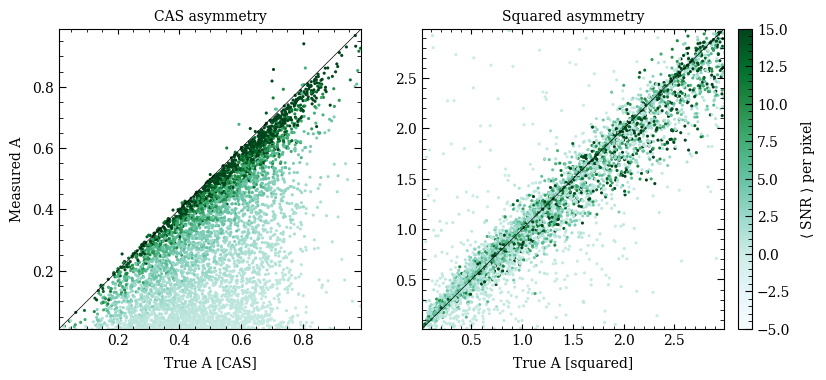

In [176]:
# data = data[data.snr > 10]

fig, axs = plt.subplots(1, 2, figsize=(7, 3))

axs[0].scatter(data.a_cas_real, data.a_cas,      s=20, c=data.snr, vmin=-5, vmax=15, cmap='BuGn');
im = axs[1].scatter(data.a_sq_real, data.a_sq,        s=20, c=data.snr, vmin=-5, vmax=15, cmap='BuGn');

for ax in axs:
    ax.plot([0,10], [0,10], 'k', lw=0.5)
axs[0].set_ylim(0.01,0.99); axs[0].set_xlim(0.01,0.99)
axs[1].set_ylim(0.01,2.99); axs[1].set_xlim(0.01,2.99)
axs[0].set_xlabel('True A [CAS]'); axs[0].set_ylabel('Measured A')
axs[1].set_xlabel('True A [squared]'); 
axs[0].set_title('CAS asymmetry', size=10)
axs[1].set_title('Squared asymmetry', size=10)


# Add a colorbar
plt.subplots_adjust(right=0.95)
cax = fig.add_axes([0.97, 0, 0.02, 1])
c = fig.colorbar(im, cax=cax)
c.set_label(r'$\langle$ SNR $\rangle$ per pixel')

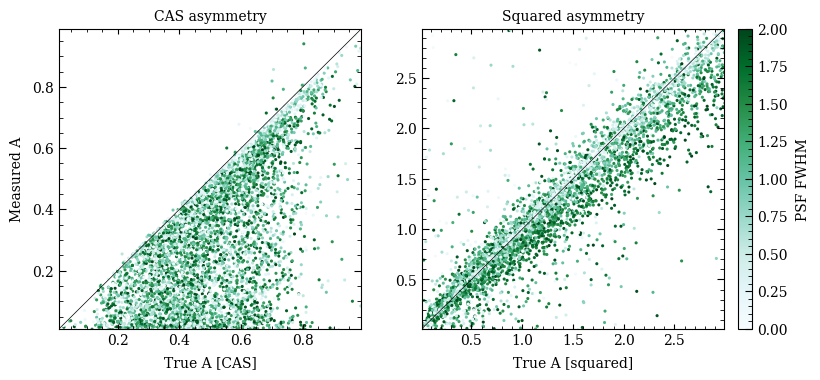

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

axs[0].scatter(data.a_cas_real, data.a_cas,      s=20, c=data.psf, vmin=0, vmax=2, cmap='BuGn');
im = axs[1].scatter(data.a_sq_real, data.a_sq,        s=20, c=data.psf, vmin=0, vmax=2, cmap='BuGn');

for ax in axs:
    ax.plot([0,10], [0,10], 'k', lw=0.5)
axs[0].set_ylim(0.01,0.99); axs[0].set_xlim(0.01,0.99)
axs[1].set_ylim(0.01,2.99); axs[1].set_xlim(0.01,2.99)
axs[0].set_xlabel('True A [CAS]'); axs[0].set_ylabel('Measured A')
axs[1].set_xlabel('True A [squared]'); 
axs[0].set_title('CAS asymmetry', size=10)
axs[1].set_title('Squared asymmetry', size=10)


# Add a colorbar
plt.subplots_adjust(right=0.95)
cax = fig.add_axes([0.97, 0, 0.02, 1])
c = fig.colorbar(im, cax=cax)
c.set_label(r'PSF FWHM')

Look at fractional error as a function of SNR, seeing, and intrinsic asymmetry

In [110]:
data[data.a_sq < -10] = -10

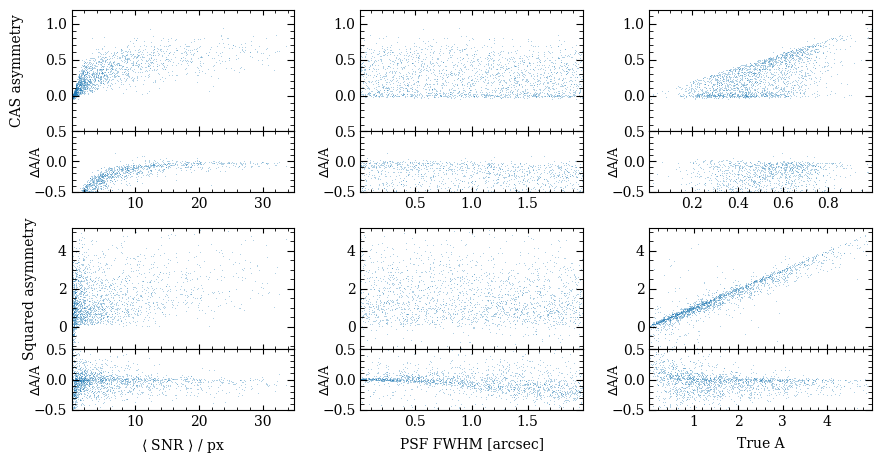

In [162]:
params = ['snr', 'psf', 'a']
labels = [r'$\langle$ SNR $\rangle$ / px', 'PSF FWHM [arcsec]', 'True A'] 
ycols = ['a_cas', 'a_sq']
ylabels = ['CAS asymmetry', 'Squared asymmetry']
xlims = [[(0.01, 34.9), (0.01, 1.99), (0.01, 0.99)], [(0.01, 34.9), (0.01, 1.99), (0.01, 4.99)]]
ylims = [[-0.49,1.19], [-1.19, 5.2]]

fig = plt.figure(figsize=(8, 4))
axs = np.zeros((2,3,2), dtype=object)

gs_main = fig.add_gridspec(2, 3, hspace=0.2, wspace=0.3)

for i in [0,1]:
    for j in [0,1,2]:
        
        # Generate axes
        gs_sub = gs_main[i,j].subgridspec(2, 1, hspace=0, height_ratios=(2,1))
        ax_main = fig.add_subplot(gs_sub[0])
        ax_sub = fig.add_subplot(gs_sub[1], sharex=ax_main)
        axs[i,j,:] = [ax_main, ax_sub]
        
        # Get the x, y values depending on which plot we are on
        y = data[f'{ycols[i]}']
        ytrue = data[f'{ycols[i]}_real']
        x = ytrue if j == 2 else data[params[j]]
        
        # Plot asymmetry vs chosen parameter 
        ax_main.scatter(x, y, s=1, alpha=0.5)
        
        # Plot asymmetry error
        ax_sub.scatter(x, (y-ytrue)/ytrue, s=1, alpha=0.5)
        
        ax_main.set_xlim(xlims[i][j][0], xlims[i][j][1])
        ax_main.set_ylim(ylims[i][0], ylims[i][1])
        ax_sub.set_ylim(-0.5,0.5)
        
for ax, label in zip(axs[1,:,1], labels):
    ax.set_xlabel(label)
for ax, ylabel in zip(axs[:,0,0], ylabels):
    ax.set_ylabel(ylabel, labelpad=15)
for ax in axs[:,:,1].flatten():
    ax.set_ylabel(r'$\Delta$A/A', labelpad=-7, size=9)

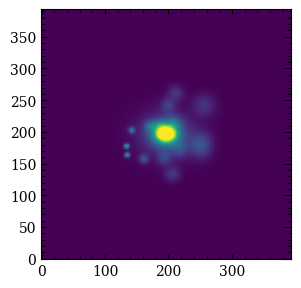

In [160]:
plt.imshow(files[7]['images'][0], vmax=2e3)

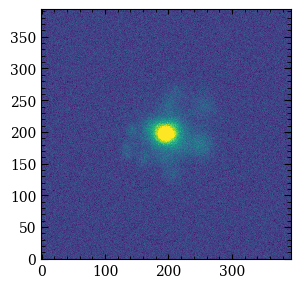

In [161]:
plt.imshow(files[7]['images'][1], vmax=2e3)

In [156]:
files[7]

{'input': {'mag': 13.823919179301718,
  'r_eff': 7.799279083372941,
  'r_pet': 42.93181818181818,
  'sersic_n': 1.3664450907154986,
  'q': 0.8035273096332647,
  'n_clumps': 15,
  'sky_mag': 23.380093601270534,
  'psf': 1.9350871119245558,
  'snr': 2.44640912510711,
  'a_cas_real': 0.40033367236079737,
  'a_sq_real': 0.7126128033672013,
  'a_cas': 0.10966022711096605,
  'a_sq': 0.5260028934100566,
  'a_sq_nocorr': 0.5052455389341483},
 'images': [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([[  50.424805,  -37.575195, -138.5752  , ...,  -32.575195,
          -218.5752  ,  160.4248  ],
         [ -48.575195,  159.4248  ,  -59.575195, ...,    8.424805,
           146.4248  ,   38.424805],
         [ 220.4248  ,  161.4248  ,  -95.575195, ...,  -91.575195,
      